In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

years = range(2013,2018)
year_dfs = []
for year in years:
    year_df = pd.read_csv('./datasets/fantasy-football-leaders-{}.csv'.format(year))
    year_df['Year'] = year
    year_dfs.append(year_df)

all_players = pd.concat(year_dfs)
all_players = all_players[['Name', 'Year', 'Position', 'FantasyPointsPerGame']]
position = all_players
# position[position['Name'] == 'Ezekiel Elliott']
numSeasons = position.groupby('Name').size().to_frame(name='NumSeasons')

position = position.set_index(['Name'])
position = position.join(numSeasons)
non_rookies = position[position['NumSeasons'] > 1]
non_rookies = non_rookies.reset_index()
non_rookies['PrevYearPPG'] = non_rookies.groupby(['Name'])['FantasyPointsPerGame'].shift(1)
non_rookies = non_rookies[np.isfinite(non_rookies['PrevYearPPG'])]
non_rookies.head()

,Name,Year,Position,FantasyPointsPerGame,NumSeasons,PrevYearPPG
1,AJ Green,2014,WR,10.5,5,13.0
2,AJ Green,2015,WR,11.7,5,10.5
3,AJ Green,2016,WR,12.0,5,11.7
4,AJ Green,2017,WR,9.5,5,12.0
6,Aaron Rodgers,2014,QB,22.1,5,18.8


In [22]:
## KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X = non_rookies['PrevYearPPG'].values.reshape(-1,1)
y = non_rookies['FantasyPointsPerGame'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
knnreg = KNeighborsRegressor(n_neighbors = 6).fit(X_train, y_train)
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

R-squared test score: 0.549


In [23]:
## Linear Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [[0.75009891]]
linear model intercept (b): [1.72430836]
R-squared score (training): 0.582
R-squared score (test): 0.561


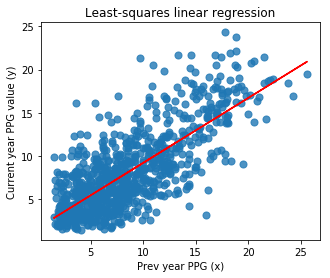

In [26]:
plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Prev year PPG (x)')
plt.ylabel('Current year PPG value (y)')
plt.show()

In [29]:
## Ridge regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: [4.97275731]
ridge regression linear model coeff:
[[9.98690319]]
R-squared score (training): 0.487
R-squared score (test): 0.478
Number of non-zero features: 1


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [[0.75009891]]
linear model intercept (b): [1.72430836]
R-squared score (training): 0.582
R-squared score (test): 0.561

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[[0.         0.40695611 0.01681008]]
(poly deg 2) linear model intercept (b): [3.0525763]
(poly deg 2) R-squared score (training): 0.590
(poly deg 2) R-squared score (test): 0.558


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(poly deg 2 + ridge) linear model coeff (w):
[[0.         0.40652381 0.0168299 ]]
(poly deg 2 + ridge) linear model intercept (b): [3.05437805]
(poly deg 2 + ridge) R-squared score (training): 0.590
(poly deg 2 + ridge) R-squared score (test): 0.558
